# Predicting Diabetes

## Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# do plotting inline instead of a separate window
%matplotlib inline

## Load and review data

In [2]:
df = pd.read_csv("./MachineLearningWithPython/notebooks/data/pima-data.csv")

In [3]:
df.shape  #tells us what our dataframe looks like - indicates whether above ran successfully.

(768, 10)

In [4]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
0,6,148,72,35,0,33.6,0.627,50,1.3790,True
1,1,85,66,29,0,26.6,0.351,31,1.1426,False
2,8,183,64,0,0,23.3,0.672,32,0.0000,True
3,1,89,66,23,94,28.1,0.167,21,0.9062,False
4,0,137,40,35,168,43.1,2.288,33,1.3790,True


## Feature definition

This will help us understand the what the columns mean in our data.

From the metadata on the data source we have the following definition of the features.

| Feature  | Description | Comments |
|--------------|-------------|--------|
| num_preg     | number of pregnancies         |
| glucose_conc | Plasma glucose concentration a 2 hours in an oral glucose tolerance test         |
| diastolic_bp | Diastolic blood pressure (mm Hg) |
| thickness | Triceps skin fold thickness (mm) |
|insulin | 2-Hour serum insulin (mu U/ml) |
| bmi |  Body mass index (weight in kg/(height in m)^2) |
| diab_pred |  Diabetes pedigree function |
| Age (years) | Age (years)|
| skin | ???? | What is this? |
| diabetes | Class variable (1=True, 0=False) |  Why is our data boolean (True/False)? |

# Cleaning the data

 ## Check for null values

In [5]:
df.isnull().values.any()

False

Now we check for any correlated columns:

Helper function that displays correlation by color.  Red is most correlated, Blue least.

In [6]:
def plot_corr(df, size=11):
    """
    Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot

    Displays:
        matrix of correlation between columns.  Blue-cyan-yellow-red-darkred => less to more correlated
                                                0 ------------------>  1
                                                Expect a darkred line running from top left to bottom right
    """

    corr = df.corr()    # data frame correlation function
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)   # color code the rectangles by correlation value
    plt.xticks(range(len(corr.columns)), corr.columns)  # draw x tick marks
    plt.yticks(range(len(corr.columns)), corr.columns)  # draw y tick marks


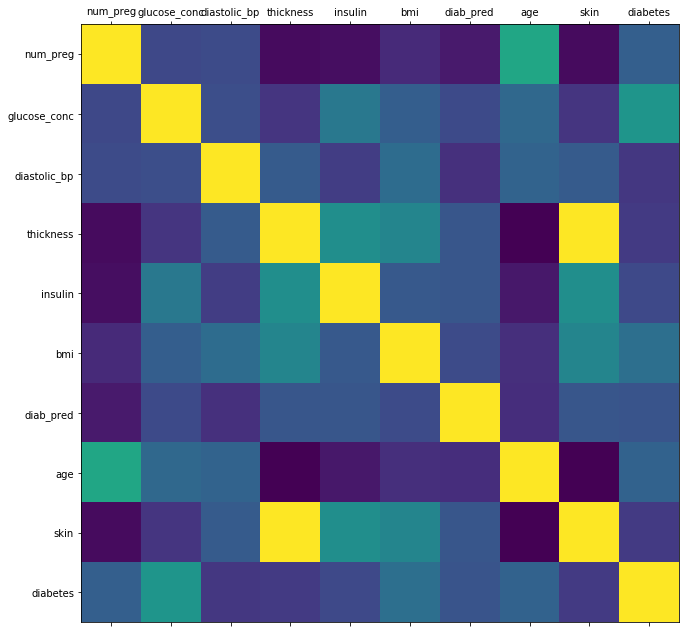

In [7]:
plot_corr(df)

Looks like skin and thickness are highly correlated so lets check the data.

In [8]:
df[["skin","thickness"]].head(5)

,skin,thickness
0,1.3790,35
1,1.1426,29
2,0.0000,0
3,0.9062,23
4,1.3790,35


From the looks of the data in the table, it may not be obvious that the data is correlated.
Which is why the .corr function is useful in letting us know. 

In [9]:
df.corr()

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,skin,diabetes
num_preg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,-0.081672,0.221898
glucose_conc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.057328,0.466581
diastolic_bp,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.207371,0.065068
thickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.436783,0.130548
bmi,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.392573,0.292695
diab_pred,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.183928,0.173844
age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,-0.113970,0.238356
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,1.000000,0.074752
diabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,0.074752,1.000000


So we can drop either skin on thickness. Lets drop the skin column. 


In [10]:
del df["skin"]

In [11]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,True
1,1,85,66,29,0,26.6,0.351,31,False
2,8,183,64,0,0,23.3,0.672,32,True
3,1,89,66,23,94,28.1,0.167,21,False
4,0,137,40,35,168,43.1,2.288,33,True


## Check data types

We need to change the boolean values to either true = 1 or false = 0.

In [12]:
diabetes_map = {True : 1, False : 0}
df['diabetes'] = df['diabetes'].map(diabetes_map)

In [13]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Check true/false ratio

This will help us determine if our data has enough cases of diabetes in order to train our model well. 

df['diabetes'] selects the column. <br>
df['diabetes'] == True  returns true or false for every row. <br>
df.loc[df['diabetes'] == True]   selects all the rows where the value for diabetes is True.

In [14]:
num_total = len(df)
num_true = len(df.loc[df['diabetes'] == 1])
num_false = len(df.loc[df['diabetes'] == 0])

print("Number of true cases: {0}   ({1}%)".format(num_true, round((num_true/num_total)*100,2)))
print("Number of false cases: {0}   ({1}%)".format(num_false, round((num_false/num_total)*100,2)))

Number of true cases: 268   (34.9%)
Number of false cases: 500   (65.1%)


# Splitting the Data

70% for training, 30% for testing.

In [24]:
from sklearn.model_selection import train_test_split

feature_col_names = ['num_preg','glucose_conc','diastolic_bp','thickness','insulin','bmi','diab_pred','age']
predicted_class_name = ['diabetes']

x = df[feature_col_names].values 
y = df[predicted_class_name].values
split_test_size = 0.30

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=split_test_size, random_state=42)
                                    #test_size = 0.3 = 30%, 42 is the answer to everything

#this will create 4 data frames with the 70:30 splits


In [28]:
print('{0:0.2f}% in training set.'.format(  (len(x_train)/len(df.index))*100  ))
print('{0:0.2f}% in test set.'.format(  (len(x_test)/len(df.index))*100  ))

69.92% in training set.
30.08% in test set.


## Check to see if the ratio of true to false in the test data was preserved

In [29]:

print("Original True  : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 1]), (len(df.loc[df['diabetes'] == 1])/len(df.index)) * 100.0))
print("Original False : {0} ({1:0.2f}%)".format(len(df.loc[df['diabetes'] == 0]), (len(df.loc[df['diabetes'] == 0])/len(df.index)) * 100.0))
print("")
print("Training True  : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train) * 100.0)))
print("Training False : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train) * 100.0)))
print("")
print("Test True      : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test) * 100.0)))
print("Test False     : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test) * 100.0)))

Original True  : 268 (34.90%)
Original False : 500 (65.10%)

Training True  : 188 (35.01%)
Training False : 349 (64.99%)

Test True      : 80 (34.63%)
Test False     : 151 (65.37%)


## Post-split data preparation

### Hidden missing values

In [30]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Notice the thickness of 0. Technically isnt a null, but can someone have a thickness of 0. <br><br>
We can:<br>
    1) ignore missing values<br>
    2) drop rows with missing hidden values<br>
    3) replace 0 values with something. <br><br>
   
Lets check if it is viable to drop rows with hidden values...

In [43]:
total_zero_rows = len(df.loc[df['insulin']==0]) + len(df.loc[df['thickness']==0])
print('Total rows with 0 values: {0}'.format(total_zero_rows))
print('Total rows: {0}'.format(len(df.index)))

Total rows with 0 values: 601
Total rows: 768


We cannot ignore most of our rows. We can Impute these 0 values.<br>We can use expert knowledge to impute data but because we dont have access to that we can replace these values with a mean.

In [49]:
print("# rows in dataframe {0}".format(len(df)))
print("# rows missing glucose_conc: {0}".format(len(df.loc[df['glucose_conc'] == 0])))
print("# rows missing diastolic_bp: {0}".format(len(df.loc[df['diastolic_bp'] == 0])))
print("# rows missing thickness: {0}".format(len(df.loc[df['thickness'] == 0])))
print("# rows missing insulin: {0}".format(len(df.loc[df['insulin'] == 0])))
print("# rows missing bmi: {0}".format(len(df.loc[df['bmi'] == 0])))
print("# rows missing diab_pred: {0}".format(len(df.loc[df['diab_pred'] == 0])))
print("# rows missing age: {0}".format(len(df.loc[df['age'] == 0])))

# rows in dataframe 768
# rows missing glucose_conc: 5
# rows missing diastolic_bp: 35
# rows missing thickness: 227
# rows missing insulin: 374
# rows missing bmi: 11
# rows missing diab_pred: 0
# rows missing age: 0


## Impute with mean values

In [56]:
from sklearn.impute import SimpleImputer

fill_0 = SimpleImputer(missing_values=0, strategy="mean")

x_train = fill_0.fit_transform(x_train)
x_test = fill_0.fit_transform(x_test)



## Training initial algorithm - Naive Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

# create Gaussian Naive Bayes model object and train it with the data
nb_model = GaussianNB()

nb_model.fit(x_train, y_train.ravel())

GaussianNB(priors=None, var_smoothing=1e-09)